In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [36]:
df=pd.read_csv("/content/mushroom.csv")
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [38]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [39]:
df.isnull().sum()

,0
Unnamed: 0,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0


In [40]:
#No null values

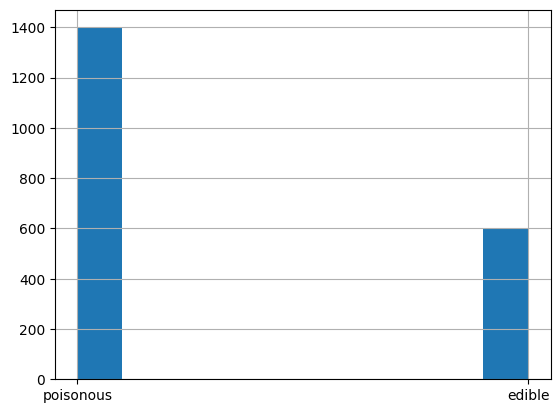

In [41]:
df['class'].hist()
plt.show()

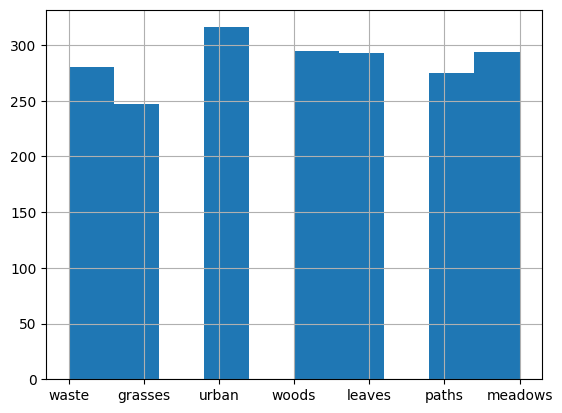

In [42]:
df['habitat'].hist()
plt.show()

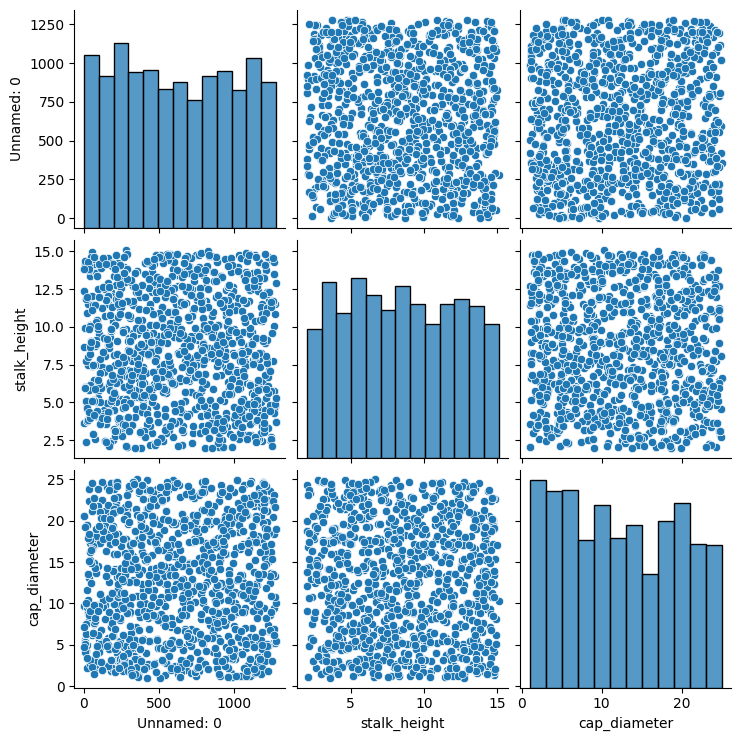

In [43]:
sns.pairplot(df)

In [44]:
numeric=df.select_dtypes(include=['int64','float64']).columns
numeric

Index(['Unnamed: 0', 'stalk_height', 'cap_diameter'], dtype='object')

In [45]:
df[numeric].corr()

,Unnamed: 0,stalk_height,cap_diameter
Unnamed: 0,1.000000,-0.001508,0.051881
stalk_height,-0.001508,1.000000,-0.003486
cap_diameter,0.051881,-0.003486,1.000000


In [46]:
outliers={}
for col in df.select_dtypes(include=np.number).columns:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  outliers[col]=df[(df[col]<lower_bound) | (df[col]>upper_bound)].index.tolist()
  print(f"{col}:{len(outliers[col])}")

Unnamed: 0:0
stalk_height:0
cap_diameter:0


In [47]:
y = df['class']
x = df.drop('class', axis=1)

In [48]:
y

,class
0,poisonous
1,edible
2,poisonous
3,poisonous
4,poisonous
...,...
1995,poisonous
1996,poisonous
1997,poisonous
1998,poisonous


In [49]:
x

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,yellow,partial,brown,two,sheathing,chocolate,clustered,waste,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,brown,universal,brown,two,sheathing,brown,numerous,waste,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,gray,universal,yellow,two,sheathing,purple,abundant,waste,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,pink,partial,yellow,two,cobwebby,green,clustered,grasses,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,white,universal,white,none,none,yellow,clustered,urban,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,orange,partial,orange,one,flaring,purple,abundant,leaves,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,orange,partial,white,one,zone,yellow,numerous,waste,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,red,partial,brown,two,evanescent,yellow,abundant,woods,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,pink,universal,yellow,one,cobwebby,brown,solitary,woods,11.092703,8.423199


In [52]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [53]:
x = pd.get_dummies(x, drop_first=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [54]:
model=LinearSVC(C=1)
model.fit(x_train,y_train)

LinearSVC(C=1)

In [55]:
y_predict_train=model.predict(x_train)
y_predict_test=model.predict(x_test)

In [56]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [58]:
print("Accuracy_test_score",accuracy_score(y_test,y_predict_test))
print("Accuracy_train_score",accuracy_score(y_train,y_predict_train))
print("precision_test_score",precision_score(y_test,y_predict_test,average='weighted'))
print("precision_train_score",precision_score(y_train,y_predict_train,average='weighted'))
print("recall_test_score",recall_score(y_test,y_predict_test,average='weighted'))
print("recall_train_score",recall_score(y_train,y_predict_train,average='weighted'))
print("f1_test_score",f1_score(y_test,y_predict_test,average='weighted'))
print("f1_train_score",f1_score(y_train,y_predict_train,average='weighted'))


Accuracy_test_score 0.6766666666666666
Accuracy_train_score 0.7278571428571429
precision_test_score 0.6281165934129606
precision_train_score 0.7057462582107693
recall_test_score 0.6766666666666666
recall_train_score 0.7278571428571429
f1_test_score 0.6286395177872903
f1_train_score 0.6745501862407536


In [59]:
model=SVC(kernel='poly',degree=1)
model.fit(x_train,y_train)

SVC(degree=1, kernel='poly')

In [60]:
y_predict_train=model.predict(x_train)
y_predict_test=model.predict(x_test)

In [61]:
print("Accuracy_test_score",accuracy_score(y_test,y_predict_test))
print("Accuracy_train_score",accuracy_score(y_train,y_predict_train))
print("precision_test_score",precision_score(y_test,y_predict_test,average='weighted'))
print("precision_train_score",precision_score(y_train,y_predict_train,average='weighted'))
print("recall_test_score",recall_score(y_test,y_predict_test,average='weighted'))
print("recall_train_score",recall_score(y_train,y_predict_train,average='weighted'))
print("f1_test_score",f1_score(y_test,y_predict_test,average='weighted'))
print("f1_train_score",f1_score(y_train,y_predict_train,average='weighted'))

Accuracy_test_score 0.6916666666666667
Accuracy_train_score 0.7035714285714286
precision_test_score 0.4784027777777778
precision_train_score 0.49501275510204085
recall_test_score 0.6916666666666667
recall_train_score 0.7035714285714286
f1_test_score 0.56559934318555
f1_train_score 0.5811470500149745


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [62]:
model=SVC(kernel='rbf',gamma=1)
model.fit(x_train,y_train)

SVC(gamma=1)

In [63]:
y_predict_train=model.predict(x_train)
y_predict_test=model.predict(x_test)


In [64]:
print("Accuracy_test_score",accuracy_score(y_test,y_predict_test))
print("Accuracy_train_score",accuracy_score(y_train,y_predict_train))
print("precision_test_score",precision_score(y_test,y_predict_test,average='weighted'))
print("precision_train_score",precision_score(y_train,y_predict_train,average='weighted'))
print("recall_test_score",recall_score(y_test,y_predict_test,average='weighted'))
print("recall_train_score",recall_score(y_train,y_predict_train,average='weighted'))
print("f1_test_score",f1_score(y_test,y_predict_test,average='weighted'))
print("f1_train_score",f1_score(y_train,y_predict_train,average='weighted'))

Accuracy_test_score 0.8816666666666667
Accuracy_train_score 1.0
precision_test_score 0.898954046639232
precision_train_score 1.0
recall_test_score 0.8816666666666667
recall_train_score 1.0
f1_test_score 0.8722794689908524
f1_train_score 1.0


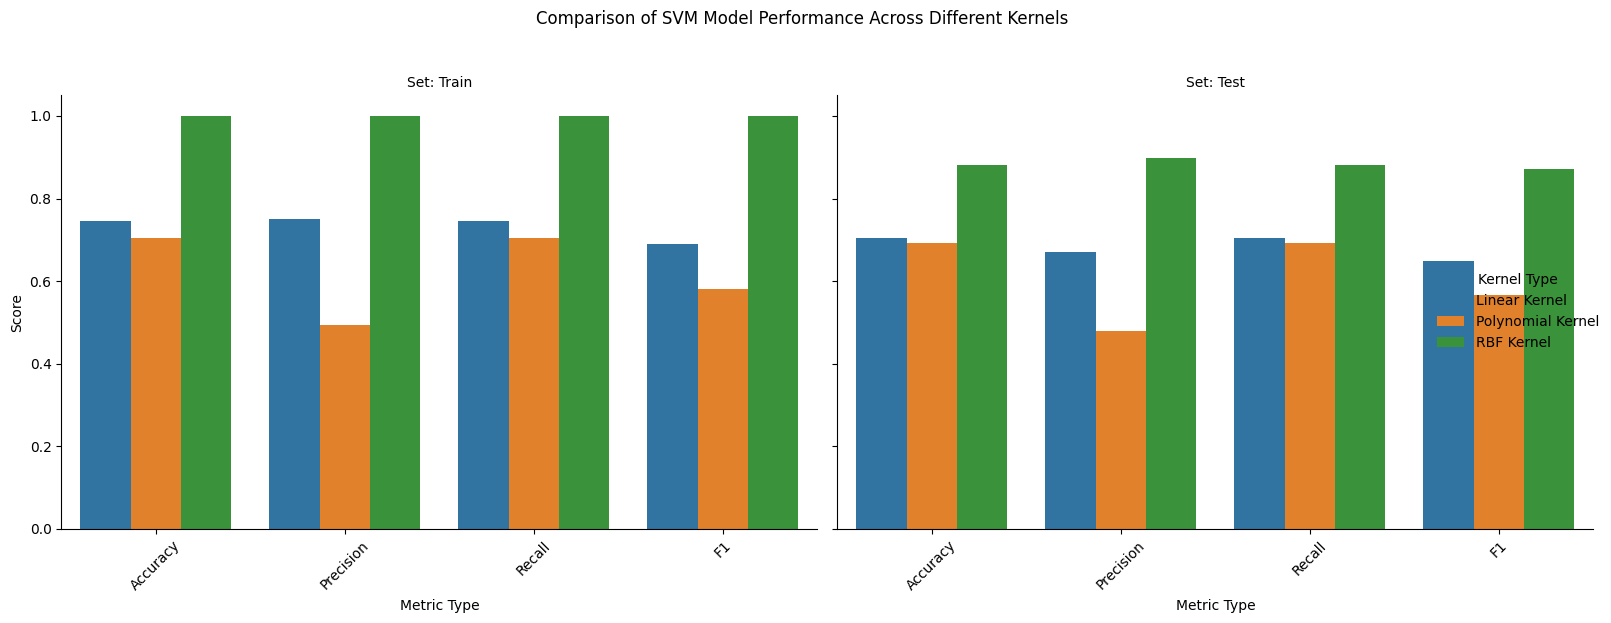

In [65]:
model_metrics = {
    'Linear Kernel': {
        'Accuracy_train': 0.7457142857142857,
        'Accuracy_test': 0.7033333333333334,
        'Precision_train': 0.7504432616147124,
        'Precision_test': 0.6697552642517515,
        'Recall_train': 0.7457142857142857,
        'Recall_test': 0.7033333333333334,
        'F1_train': 0.6892295925362731,
        'F1_test': 0.6478439092567025
    },
    'Polynomial Kernel': {
        'Accuracy_train': 0.7035714285714286,
        'Accuracy_test': 0.6916666666666667,
        'Precision_train': 0.49501275510204085,
        'Precision_test': 0.4784027777777778,
        'Recall_train': 0.7035714285714286,
        'Recall_test': 0.6916666666666667,
        'F1_train': 0.5811470500149745,
        'F1_test': 0.56559934318555
    },
    'RBF Kernel': {
        'Accuracy_train': 1.0,
        'Accuracy_test': 0.8816666666666667,
        'Precision_train': 1.0,
        'Precision_test': 0.898954046639232,
        'Recall_train': 1.0,
        'Recall_test': 0.8816666666666667,
        'F1_train': 1.0,
        'F1_test': 0.8722794689908524
    }
}

metrics_df = pd.DataFrame.from_dict(model_metrics, orient='index')
metrics_df.index.name = 'Kernel Type'

# Prepare data for plotting
metrics_melted = metrics_df.reset_index().melt(id_vars='Kernel Type', var_name='Metric', value_name='Score')

# Separate train and test scores
metrics_melted['Set'] = metrics_melted['Metric'].apply(lambda x: 'Train' if 'train' in x else 'Test')
metrics_melted['Metric_Type'] = metrics_melted['Metric'].apply(lambda x: x.replace('_train', '').replace('_test', ''))


g = sns.catplot(x='Metric_Type', y='Score', hue='Kernel Type', col='Set', data=metrics_melted, kind='bar', height=6, aspect=1.2, sharey=True)
g.set_axis_labels('Metric Type', 'Score')
g.set_titles('Set: {col_name}')
g.fig.suptitle('Comparison of SVM Model Performance Across Different Kernels', y=1.03) # Adjust y to prevent overlap
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
plt.ylim(0, 1.05) # Scores are between 0 and 1
plt.tight_layout()
plt.show()

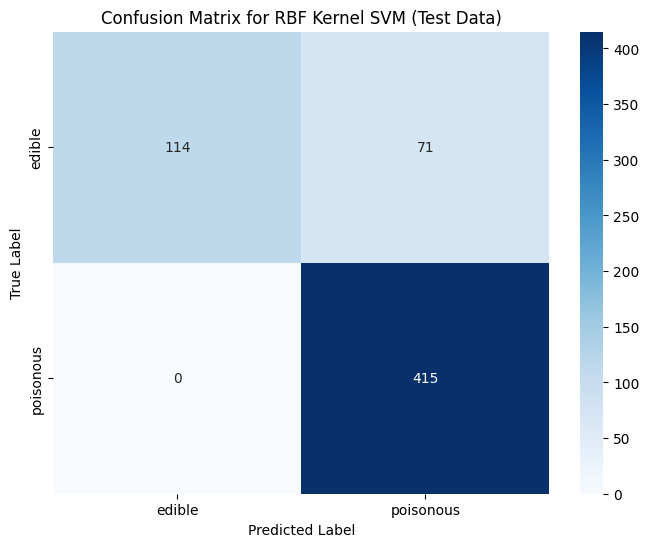

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_test and y_predict_test correspond to the RBF kernel model, as it was the last one executed.
cm = confusion_matrix(y_test, y_predict_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['edible', 'poisonous'], yticklabels=['edible', 'poisonous'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for RBF Kernel SVM (Test Data)')
plt.show()

In [67]:
#71 wrongly classified as poisionous

In [68]:
from sklearn.model_selection import GridSearchCV

In [79]:
param_grid={
    "C":[2,3]
}

In [72]:
search_model=GridSearchCV(LinearSVC(),param_grid,n_jobs=-1,cv=2)
search_model.fit(x_train,y_train)


GridSearchCV(cv=2, estimator=LinearSVC(), n_jobs=-1, param_grid={'C': [2, 3]})

In [73]:
best_model=search_model.best_estimator_

In [74]:
best_model.fit(x_train,y_train)

LinearSVC(C=3)

In [75]:
y_predict_test=best_model.predict(x_test)

In [80]:
print("Accuracyscore_cv",accuracy_score(y_test,y_predict_test))
print("precision_cv",precision_score(y_test,y_predict_test, average='weighted'))
print("recall_cv",recall_score(y_test,y_predict_test, average='weighted'))
print("f1score_cv",f1_score(y_test,y_predict_test, average='weighted'))

Accuracyscore_cv 0.68
precision_cv 0.6352720093246748
recall_cv 0.68
f1score_cv 0.6352594548469676


In [98]:
param_grid={
    "degree":[2,3],
    "kernel":["poly"]
}

In [101]:
from sklearn.svm import SVC
search_model=GridSearchCV(SVC(),param_grid,n_jobs=-1,cv=2)
search_model.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=SVC(), n_jobs=-1,
             param_grid={'degree': [2, 3], 'kernel': ['poly']})

In [86]:
best_model=search_model.best_estimator_

In [87]:
best_model.fit(x_train,y_train)

SVC(degree=2, kernel='poly')

In [88]:
y_predict_test=best_model.predict(x_test)

In [89]:
print("Accuracyscore_cv",accuracy_score(y_test,y_predict_test))
print("precision_cv",precision_score(y_test,y_predict_test, average='weighted'))
print("recall_cv",recall_score(y_test,y_predict_test, average='weighted'))
print("f1score_cv",f1_score(y_test,y_predict_test, average='weighted'))

Accuracyscore_cv 0.6916666666666667
precision_cv 0.4784027777777778
recall_cv 0.6916666666666667
f1score_cv 0.56559934318555


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [90]:
param_grid={
    "gamma":[1,2],
    "kernel":["rbf"]
}

In [92]:
from sklearn.svm import SVC
search_model=GridSearchCV(SVC(),param_grid,n_jobs=-1,cv=2)
search_model.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=SVC(), n_jobs=-1,
             param_grid={'gamma': [1, 2], 'kernel': ['rbf']})

In [93]:
best_model=search_model.best_estimator_

In [94]:
best_model.fit(x_train,y_train)

SVC(gamma=1)

In [95]:
y_predict_test=best_model.predict(x_test)

In [97]:
print("Accuracyscore_cv",accuracy_score(y_test,y_predict_test))
print("precision_cv",precision_score(y_test,y_predict_test, average='weighted'))
print("recall_cv",recall_score(y_test,y_predict_test, average='weighted'))
print("f1score_cv",f1_score(y_test,y_predict_test, average='weighted'))

Accuracyscore_cv 0.8816666666666667
precision_cv 0.898954046639232
recall_cv 0.8816666666666667
f1score_cv 0.8722794689908524


In [100]:
'''
Overall Conclusion:

Based on the analysis, the Support Vector Machine with an RBF kernel consistently demonstrated the highest performance metrics on the test data. Although it showed 100% accuracy on the training data (suggesting some overfitting), its strong generalization to the test set (88.17% accuracy) makes it the most effective model for this classification task among those evaluated. The confusion matrix also highlighted a critical aspect for mushroom classification: the RBF model did not misclassify any poisonous mushrooms as edible (no false negatives), which is paramount in this context, although it did misclassify 71 edible mushrooms as poisonous (false positives).'''

'\nOverall Conclusion:\n\nBased on the analysis, the Support Vector Machine with an RBF kernel consistently demonstrated the highest performance metrics on the test data. Although it showed 100% accuracy on the training data (suggesting some overfitting), its strong generalization to the test set (88.17% accuracy) makes it the most effective model for this classification task among those evaluated. The confusion matrix also highlighted a critical aspect for mushroom classification: the RBF model did not misclassify any poisonous mushrooms as edible (no false negatives), which is paramount in this context, although it did misclassify 71 edible mushrooms as poisonous (false positives).'

In [102]:
#strengths and weakness
#For the mushroom dataset, SVMs, particularly with an RBF kernel, offer high accuracy and crucial safety by avoiding false negatives, but they can suffer from sensitivity to kernel choice and hyperparameters, potential overfitting, and limited interpretability.

In [103]:
#EFFECTIVE IN HIGH DIMENSIONAL SPPACES
#ROBUSTNESS TO OVERFITTING
#HANDLING SMALL TO MEDIUM SIZED DATASETS